In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def factorial(n):
    if n==0:
        return 1
    fact = 1
    for i in range(1, n+1):
        fact *= i
    return fact

def taylor_mthd(f, a, b, N, IV):
    h = (b-a)/float(N)
    t = np.arange(a, b+h, h)
    x = np.zeros((N+1,))
    t[0], x[0] = IV
    for i in range(1,N+1):
        T = 0
        for j in range(len(f)):
            h_factor = h**(j)/float(factorial(j+1))
            T += h_factor*f[j]( t[i-1], x[i-1] )
        x[i] = x[i-1] +h*T
    return t, x

In [8]:
a, b = 0.0, 2.0
N = 10
h = (b-a)/N

IV = (0.0, 0.5)
t = np.arange(a, b+h, h)

f   = lambda t, x: x-t**2.0+1
df  = lambda t, x: x-t**2.0+1-2*t
ddf = lambda t, x: x-t**2.0-2*t-1

t, x2 = taylor_mthd([f, df], a, b, N, IV)
t, x3 = taylor_mthd([f, df, ddf], a, b, N, IV)

In [9]:
def exact( t ):
    return (t+1.0)**2.0-0.5*np.exp(t)

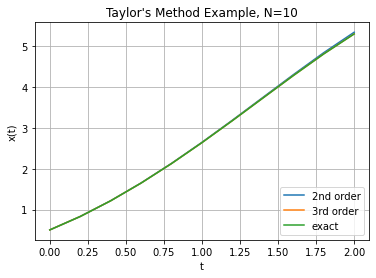

In [10]:
plt.plot( t, x2, label='2nd order' )
plt.plot( t, x3, label='3rd order' )
plt.plot( t, exact(t), label='exact' )
plt.title( "Taylor's Method Example, N="+str(N) )
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(loc=4)
plt.grid()

In [11]:
class GradientDescent:
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = [] 
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w) 
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

In [12]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w): 
            yh =  x @ w 
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)  
        self.w = optimizer.run(gradient, x, y, w0) 
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

t= 0 w =  -2.0372133756724806 b= -0.2511944867854361
t= 50 w =  -2.8401228573870934 b= 2.2664438004781697
t= 100 w =  -3.1332390159356374 b= 4.17715263626571
t= 150 w =  -3.3503087276779047 b= 5.5921446253174345
t= 200 w =  -3.511061584119518 b= 6.640029206986472
t= 250 w =  -3.630108505252486 b= 7.41604921628389


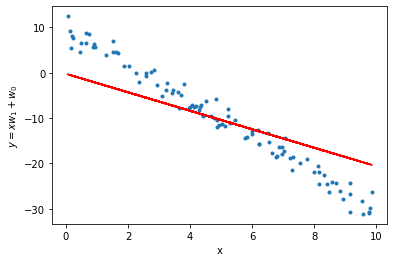

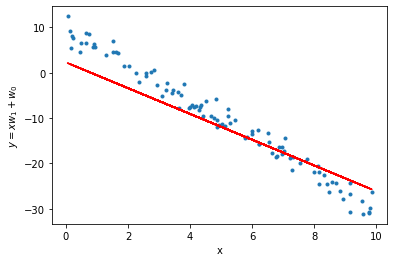

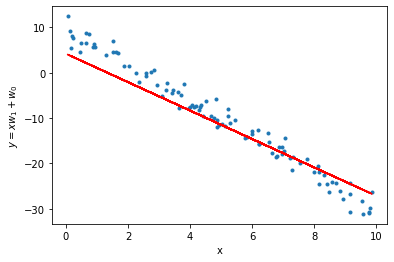

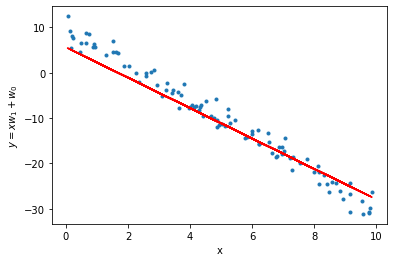

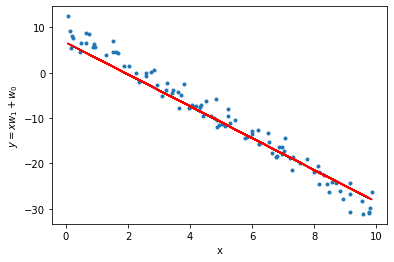

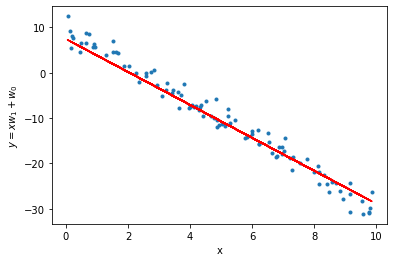

In [13]:
N = 100
x = np.random.rand(N) * 10
y = -4*x + 10 + 2*np.random.randn(N)
optimizer = GradientDescent(learning_rate=.05, max_iters=300, record_history=True)
model = LinearRegression()
model.fit(x,y, optimizer)

for t,w in enumerate(optimizer.w_history):
    if t%50 == 0:
        plt.figure()
        plt.plot(x, y, '.')
        print('t=',t ,'w = ', w[0],'b=', w[1])
        plt.plot(x, x*w[0]+w[1], 'r-')
        plt.xlabel('x')
        plt.ylabel(r'$y=xw_1 + w_0$')